## Before training preprocessing
These steps are done before training the model. The dataset is loaded and preprocessed.

In [7]:
import tensorflow_datasets as tfds

dataset, metadata = tfds.load('oxford_iiit_pet:3.*.*', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [8]:
import tensorflow as tf

def preprocess_image(image, label):
    image = tf.cast(image, tf.float32)
    image_size = tf.constant([160, 160], dtype=tf.int32) if tf.reduce_min(tf.shape(image)[:2]) < 96 else tf.constant(
        [448, 448], dtype=tf.int32)
    image = tf.image.resize(image, image_size)

    return image, label

In [9]:
# Preprocess the dataset
train_dataset = train_dataset.map(preprocess_image)
test_dataset = test_dataset.map(preprocess_image)

2024-03-24 17:22:14.171216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [4]
	 [[{{node Placeholder/_1}}]]
2024-03-24 17:22:14.171518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [4]
	 [[{{node Placeholder/_1}}]]


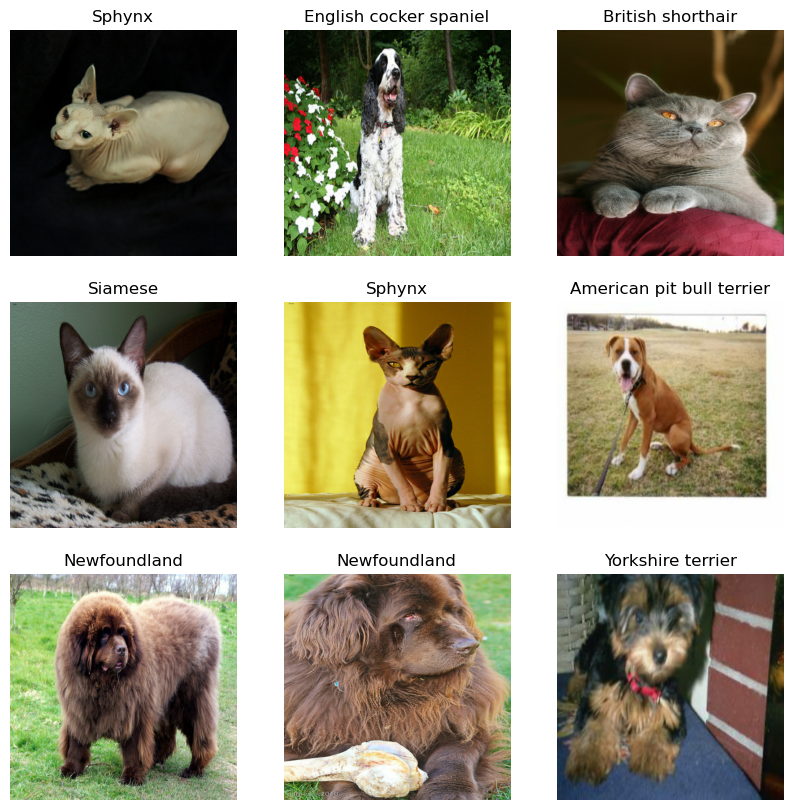

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (X, y) in enumerate(train_dataset.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X / 255)  # Normalize image to [0,1] range for plotting
    # Show the label of the class as the title of the image
    plt.title(metadata.features['label'].int2str(y).replace('_', ' ').capitalize())
    plt.axis("off")

plt.show()